# Heart Failure Prediction

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('D:/Excell/Tableau/heart_failure_clinical_data.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print('Shape of Data',data.shape)

Shape of Data (299, 13)


In [5]:
print('null values')
data.isnull().sum()

null values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis

Total No. Of Living Cases : 203
Total No. Of Died Cases : 96


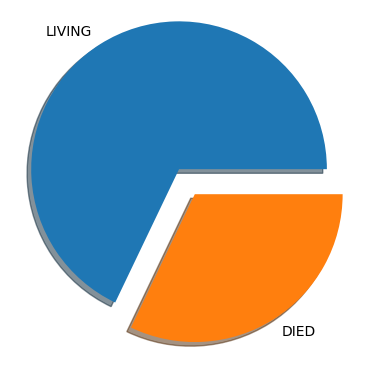

In [8]:
#Seeing the distribution of classes will help identify  types

len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
len_death = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])

labels = ['LIVING', 'DIED']
print('Total No. Of Living Cases :', len_live)
print('Total No. Of Died Cases :', len_death)

plt.pie(arr,labels=labels, explode = [0.2,0.0], shadow=True)
plt.show()

#We are working with imbalanced data
#Not equally Distributed between Classes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


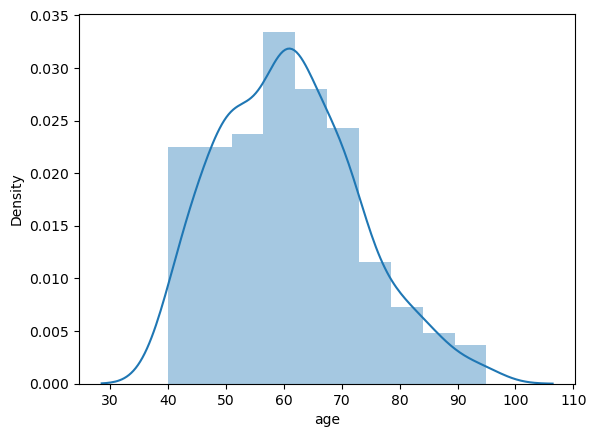

In [9]:
#Age Distribution

sns.distplot(data['age'])
plt.show()

Total Number of Died Cases 85
Total Number of Alive 167


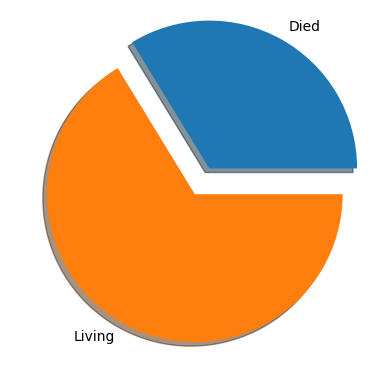

In [10]:
#selecting rows that are above 50 seeing died or Not

death_abv_fifty = sum((data.age>=50) & (data.DEATH_EVENT==1))
alive_abv_fifty = sum((data.age >= 50) & (data.DEATH_EVENT ==0))

print('Total Number of Died Cases',death_abv_fifty)
print('Total Number of Alive',alive_abv_fifty )

arr2=np.array([death_abv_fifty,alive_abv_fifty])
labels=['Died','Living']

plt.pie(arr2,labels=labels, explode = [0.2,0.0],shadow=True )
plt.show()

#inference: Most people above 50 


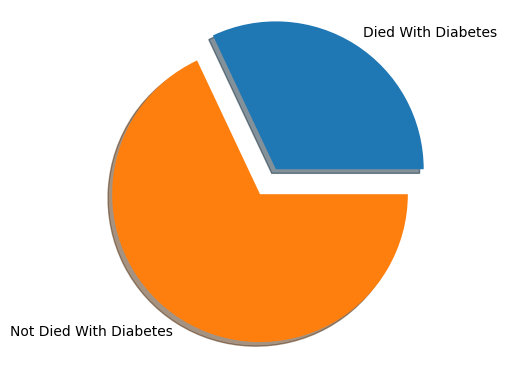

In [11]:


patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0]
patient_nhave_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_nhave_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr3 = np.array([len_d_died, len_d_alive])

labels = ['Died With Diabetes', 'Not Died With Diabetes']


plt.pie(arr3,labels=labels, explode = [0.2,0.0], shadow=True)
plt.show()

#Most of people alive have Diabetes



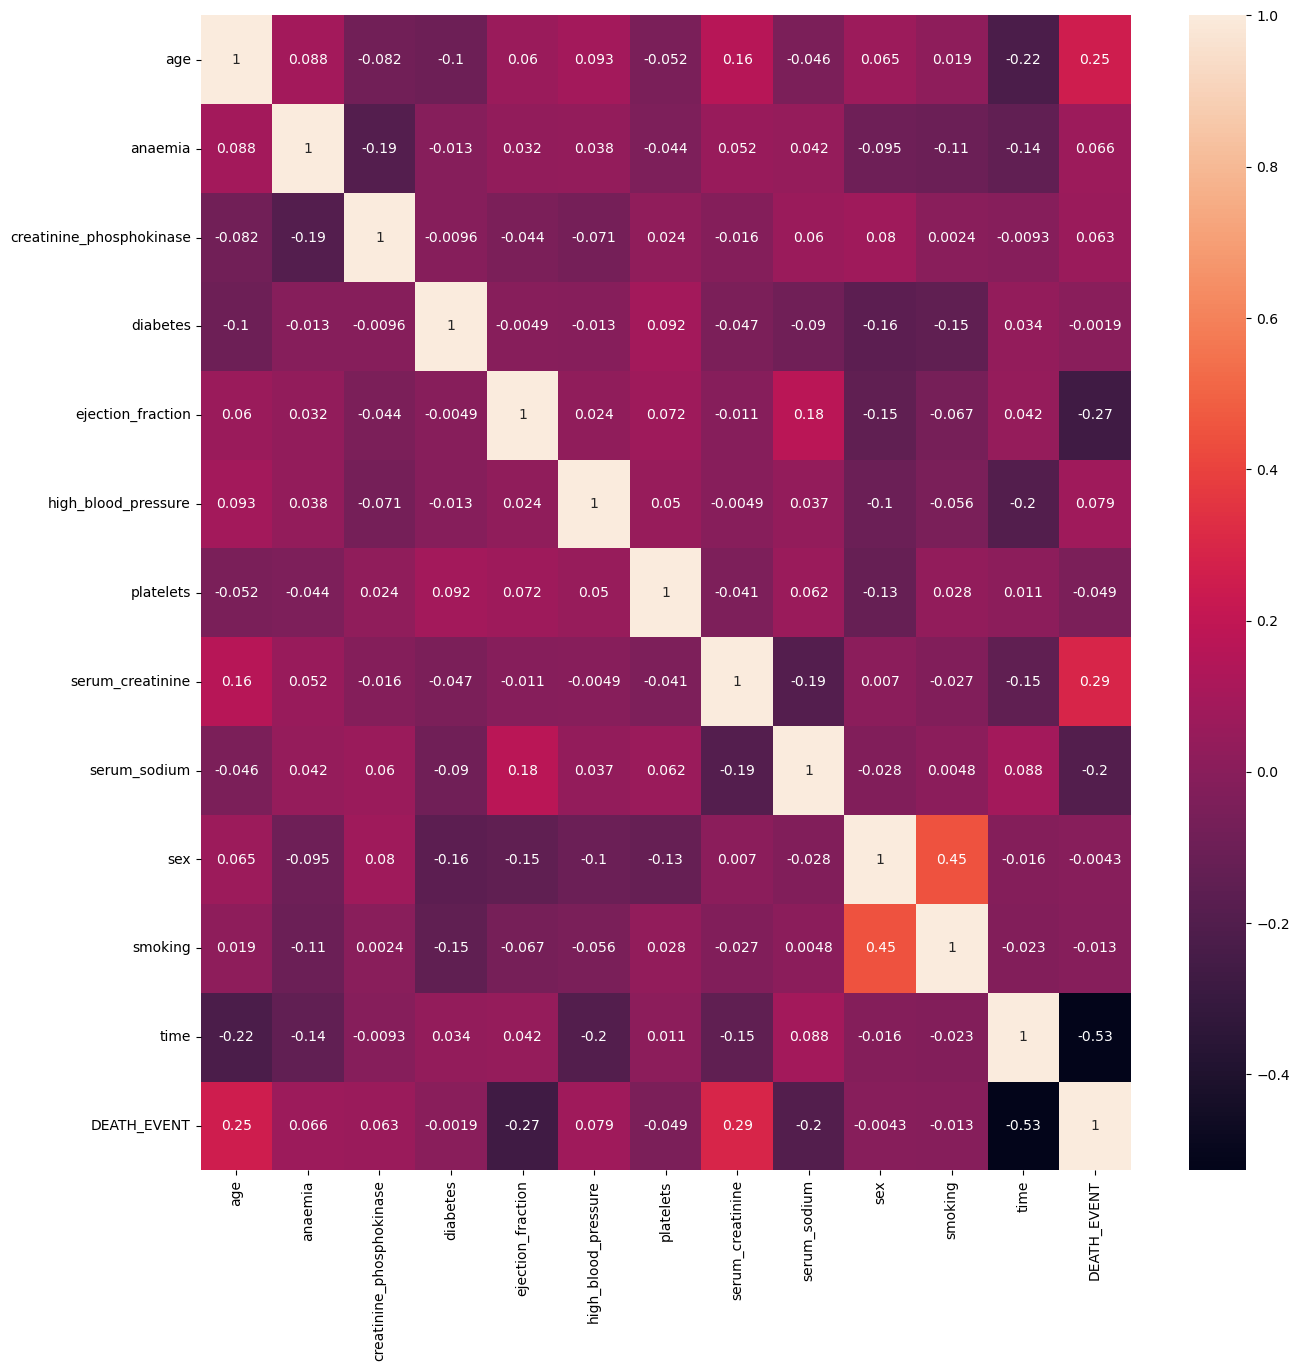

In [12]:
# Checking the correlatin of Variables
corr = data.corr()
plt.subplots(figsize=(15,15))

sns.heatmap(corr,annot=True)
plt.show()

#Interpretation of correlation matrix


In [13]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# Dataset Development

In [14]:
from sklearn.model_selection import train_test_split

x= data.drop('DEATH_EVENT', axis=1)
y = data["DEATH_EVENT"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print('Shape of X_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (209, 12)
Shape of x_test (90, 12)
Shape of y_train (209,)
Shape of y_test (90,)


# Feauture Engineering

In [15]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    x_int = X.copy(deep = True)
    
    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+'_x_'+ feature_j_name
            x_int[feature_i_j_name] = feature_i_data * feature_j_data
    
    return x_int

x_train_mod = add_interactions(x_train)
x_test_mod = add_interactions(x_test)

In [16]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
224,58.000,0,582,1,25,0,504000.00,1.0,138,1,...,138.0,1.0,0.0,205.0,138,0,28290,0,205,0
68,70.000,0,161,0,25,0,244000.00,1.2,142,0,...,170.4,0.0,0.0,79.2,0,0,9372,0,0,0
222,42.000,1,86,0,35,0,365000.00,1.1,139,1,...,152.9,1.1,1.1,221.1,139,139,27939,1,201,201
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,...,145.0,0.0,0.0,30.0,0,0,4350,0,0,0
16,87.000,1,149,0,38,0,262000.00,0.9,140,1,...,126.0,0.9,0.0,12.6,140,0,1960,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,...,136.0,0.0,0.0,172.0,0,0,23392,0,0,0
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,...,125.1,0.9,0.9,63.9,139,139,9869,1,71,71
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,...,178.1,1.3,0.0,114.4,137,0,12056,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,...,208.0,1.6,1.6,390.4,130,130,31720,1,244,244


# Model Building

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):

    '''
    Function for evaluating our Models
    '''
    print('Accuracy Score', accuracy_score(y_test,y_pred))
    print('Precision Score', precision_score(y_test,y_pred))
    print('Recall Score', recall_score(y_test,y_pred))
    
    print('Confussion Score \n', confusion_matrix(y_test,y_pred))


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train,y_train)

lr_clf_pred = lr_clf.predict(x_test)

In [19]:
y_pred = lr_clf.predict(x_test)
evaluating_model(y_test, y_pred)

Accuracy Score 0.8
Precision Score 0.88
Recall Score 0.5945945945945946
Confussion Score 
 [[50  3]
 [15 22]]


#### Logistic Regression Using StandardScaler

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(x_train,y_train)

y_pred1 = lr_clf_pip.predict(x_test)
evaluating_model(y_test, y_pred1)

Accuracy Score 0.7888888888888889
Precision Score 0.875
Recall Score 0.5675675675675675
Confussion Score 
 [[50  3]
 [16 21]]


### GridSearchCV

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000],
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.738 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
print("The best C and gamma: ", grid.best_estimator_)


The best C and gamma:  SVC(C=1, gamma=0.0001)


In [23]:
svc = SVC(C=10, gamma =0.0001)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)
evaluating_model(y_test, y_pred2)

Accuracy Score 0.6333333333333333
Precision Score 0.75
Recall Score 0.16216216216216217
Confussion Score 
 [[51  2]
 [31  6]]


##  DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model= rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print("Training Score: {:.3f})".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test score {:.3f} ".format(accuracy))
    
    return best_model

randomized_search(params = {'criterion':['entropy', 'gini'],
                            'splitter':['random', 'best'],
                            'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075,0.01],
                            'max_leaf_nodes':[10,15,20, 25,30, 35, 40 ,45,50, None],
                            'min_samples_split':[2,3,4,5,6,8,10],
                            'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
                            'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.10, 0.15, 0.2],
                            'max_features':['auto',0.95,0.90,0.85,0.80,0.75,0.70],
                            'max_depth':[None, 2,4,6,8],
                            'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                            
                        
})


Training Score: 0.881)
Test score 0.744 


DecisionTreeClassifier(max_depth=8, max_features=0.8,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [25]:
ds_clf=DecisionTreeClassifier(max_depth=8, max_features=0.8, max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2, splitter='random')

ds_clf.fit(x_train, y_train)
pred4=ds_clf.predict(x_test)
evaluating_model(y_test, pred4)

Accuracy Score 0.7666666666666667
Precision Score 0.8636363636363636
Recall Score 0.5135135135135135
Confussion Score 
 [[50  3]
 [18 19]]


## RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

randomized_search( params =
                  {
                      'min_samples_leaf':[1,2,4,6,8,10,20,30],
                      'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.2],
                      'max_features':['auto', 0.8,0.7,0.6, 0.5, 0.4],
                      'max_depth':[None, 2,4,6,8,10,20]
                      
                  }, clf=RandomForestClassifier(random_state=2))

Training Score: 0.881)
Test score 0.778 


RandomForestClassifier(max_depth=4, min_impurity_decrease=0.01,
                       min_samples_leaf=6, random_state=2)

In [27]:
rf_clf =RandomForestClassifier(max_depth=4,max_features=0.5 ,min_impurity_decrease=0.01,
                       min_samples_leaf=6, random_state=2)

rf_clf.fit(x_train, y_train)
pred5 = rf_clf.predict(x_test)
evaluating_model(y_test, pred5)

Accuracy Score 0.7777777777777778
Precision Score 0.8695652173913043
Recall Score 0.5405405405405406
Confussion Score 
 [[50  3]
 [17 20]]


# Xgboost

In [28]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                     learning_rate=0.01,
                     max_depth =4,
                     n_estimators=400,
                     subsample =1.0
)

eval_set =[(x_test, y_test)]

xgb1.fit(x_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set= eval_set, verbose=True)


[0]	validation_0-logloss:0.68912
[1]	validation_0-logloss:0.68518
[2]	validation_0-logloss:0.68135
[3]	validation_0-logloss:0.67760
[4]	validation_0-logloss:0.67410
[5]	validation_0-logloss:0.67052
[6]	validation_0-logloss:0.66719
[7]	validation_0-logloss:0.66377
[8]	validation_0-logloss:0.66060
[9]	validation_0-logloss:0.65734
[10]	validation_0-logloss:0.65416
[11]	validation_0-logloss:0.65121
[12]	validation_0-logloss:0.64818
[13]	validation_0-logloss:0.64537
[14]	validation_0-logloss:0.64247
[15]	validation_0-logloss:0.63980
[16]	validation_0-logloss:0.63703
[17]	validation_0-logloss:0.63432
[18]	validation_0-logloss:0.63184


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.62925
[20]	validation_0-logloss:0.62689
[21]	validation_0-logloss:0.62443
[22]	validation_0-logloss:0.62201
[23]	validation_0-logloss:0.61982
[24]	validation_0-logloss:0.61752
[25]	validation_0-logloss:0.61527
[26]	validation_0-logloss:0.61324
[27]	validation_0-logloss:0.61109
[28]	validation_0-logloss:0.60916
[29]	validation_0-logloss:0.60685
[30]	validation_0-logloss:0.60459
[31]	validation_0-logloss:0.60235
[32]	validation_0-logloss:0.59977
[33]	validation_0-logloss:0.59724
[34]	validation_0-logloss:0.59514
[35]	validation_0-logloss:0.59271
[36]	validation_0-logloss:0.59032
[37]	validation_0-logloss:0.58836
[38]	validation_0-logloss:0.58607
[39]	validation_0-logloss:0.58382
[40]	validation_0-logloss:0.58128
[41]	validation_0-logloss:0.57903
[42]	validation_0-logloss:0.57711
[43]	validation_0-logloss:0.57494
[44]	validation_0-logloss:0.57291
[45]	validation_0-logloss:0.57110
[46]	validation_0-logloss:0.56906
[47]	validation_0-logloss:0.56715
[48]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
pred6 =xgb1.predict(x_test)
evaluating_model(y_test, pred6)

Accuracy Score 0.7777777777777778
Precision Score 0.84
Recall Score 0.5675675675675675
Confussion Score 
 [[49  4]
 [16 21]]


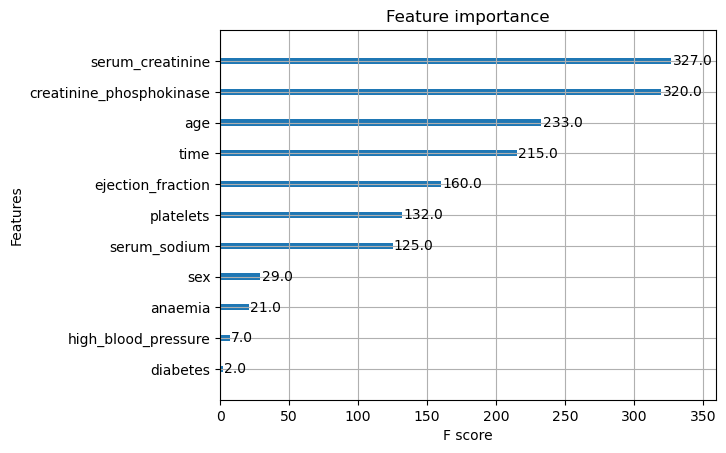

In [30]:
from xgboost import plot_importance

plot_importance(xgb1)
plt.show()

## GradientBoosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
gbdt.fit(x_train, y_train)

pred_gdbt = gbdt.predict(x_test)
evaluating_model(y_test, pred_gdbt)

Accuracy Score 0.7444444444444445
Precision Score 0.8181818181818182
Recall Score 0.4864864864864865
Confussion Score 
 [[49  4]
 [19 18]]


## Choosing the best model

In [35]:
#We choose xGboost

import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0])